In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import csv
import glob

In [2]:
gs = {'torino': -196, 'fez': -246, 'kyiv': -194}

In [3]:
res = {}
for which in ['fez', 'kyiv', 'torino']:
    for ang in ['lin']:
        for les in [0, 1]:
            for p in range(26):
                fname = Path(f"./results/Hamiltonian_ibm_{which}_0/{ang}_{les}/{p=}/results.csv")
                try:
                    with open(fname, 'r') as f:
                        rd = csv.DictReader(f, delimiter=';', quotechar="'")
                        ind = (which, ang, les, p)
                        res[ind] = list(rd)
                except FileNotFoundError:
                    pass

In [4]:
for x in sorted(res.keys()):
    print(x)

('fez', 'lin', 0, 5)
('fez', 'lin', 0, 10)
('fez', 'lin', 0, 15)
('fez', 'lin', 0, 20)
('fez', 'lin', 0, 25)
('fez', 'lin', 1, 5)
('fez', 'lin', 1, 10)
('fez', 'lin', 1, 15)
('fez', 'lin', 1, 20)
('fez', 'lin', 1, 25)
('kyiv', 'lin', 0, 5)
('kyiv', 'lin', 0, 10)
('kyiv', 'lin', 0, 15)
('kyiv', 'lin', 0, 20)
('kyiv', 'lin', 0, 25)
('kyiv', 'lin', 1, 5)
('kyiv', 'lin', 1, 10)
('kyiv', 'lin', 1, 15)
('kyiv', 'lin', 1, 20)
('kyiv', 'lin', 1, 25)
('torino', 'lin', 0, 5)
('torino', 'lin', 0, 10)
('torino', 'lin', 0, 15)
('torino', 'lin', 0, 20)
('torino', 'lin', 0, 25)
('torino', 'lin', 1, 5)
('torino', 'lin', 1, 10)
('torino', 'lin', 1, 15)
('torino', 'lin', 1, 20)
('torino', 'lin', 1, 25)


In [5]:
def plot_energy_lin(ind):

    clrs = {"BP": 'blue', "CTM": 'red', 'MPS': 'green'}
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(5, 3)
    miny = 0
    maxy = -1000
    if ind in res:
        for pt in res[ind]:
            mrk = 'x' if pt["chi"] == '1' else '+'
            clr = clrs[pt["env"]]
            ax.scatter([1 / float(pt["D"])], float(pt["eng"]),
                        marker=mrk, color=clr, s=50)
            miny = min(miny, float(pt["eng"]))
            maxy = max(maxy, float(pt["eng"]))

        #ax.set_xscale('log')
        ax.set_xlabel('1 / D')
        ax.set_ylabel(f'eng')
        ax.set_ylim(miny-1, maxy+1)
        ax.set_xlim(0, 1)

        ax.grid(which='major')
        ax.grid(which='minor')
        ax.set_title(f'{ind}')

        ax.scatter([1.2], [1e-2], marker='+', color='black', s=50, label='chi>1')
        ax.scatter([1.2], [1e-2], marker='x', color='black', s=50, label='BP (chi=1)')
        for k, v in clrs.items():
            ax.scatter([1.2], [1e-2], marker='o', color=v, s=50, label=k)

        ax.legend()
    # plt.legend()
# plt.show()

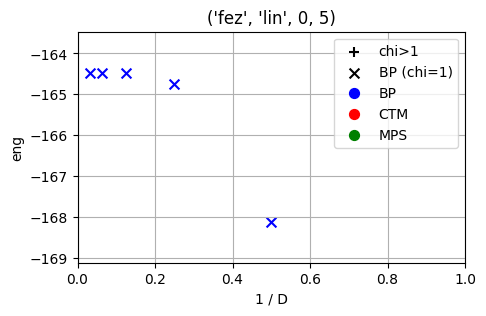

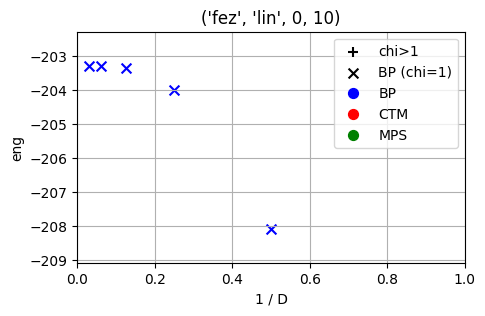

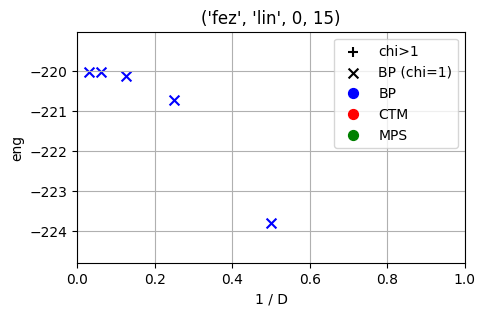

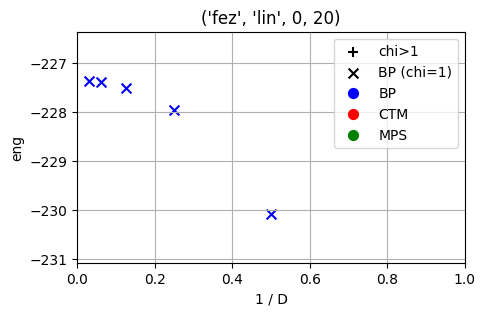

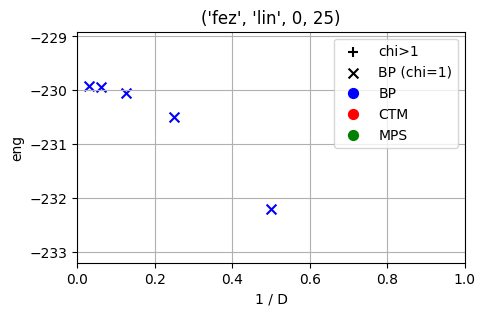

In [6]:
for p in range(5, 26, 5):
    plot_energy_lin(('fez', 'lin', 0, p))


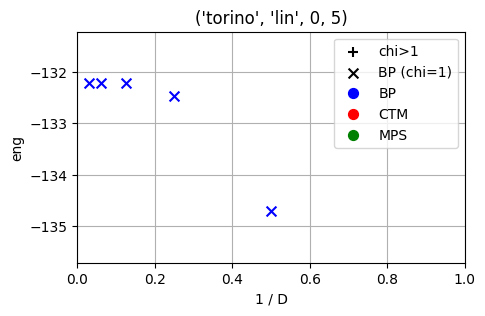

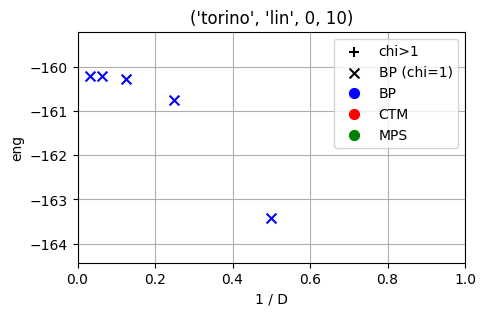

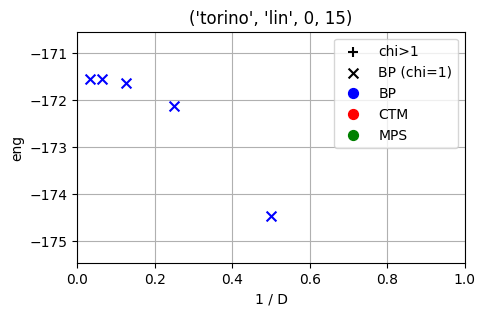

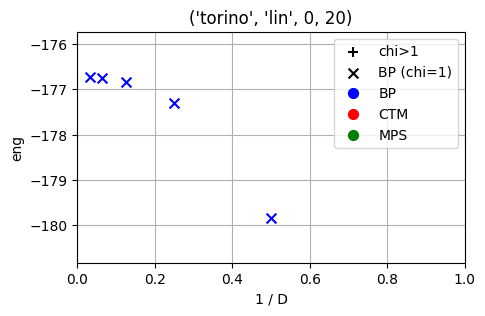

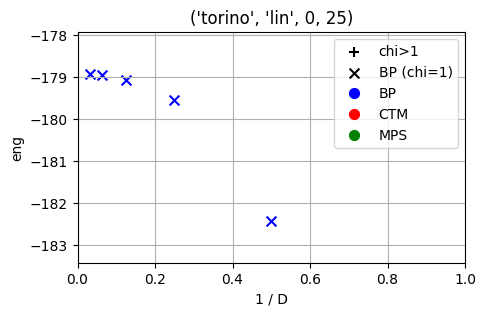

In [7]:
for p in range(5, 26, 5):
    plot_energy_lin(('torino', 'lin', 0, p))

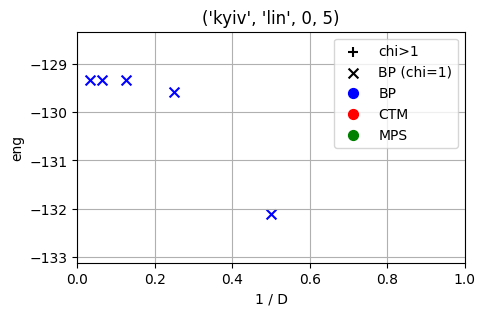

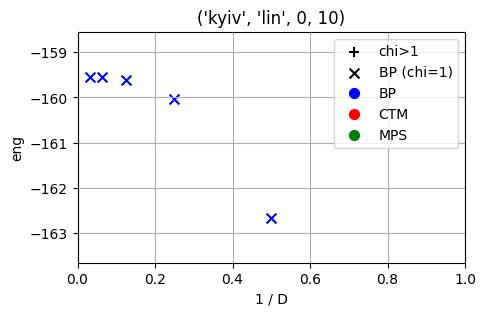

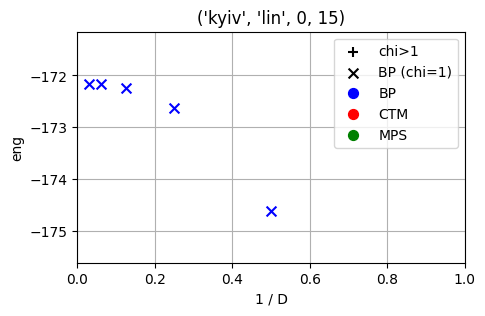

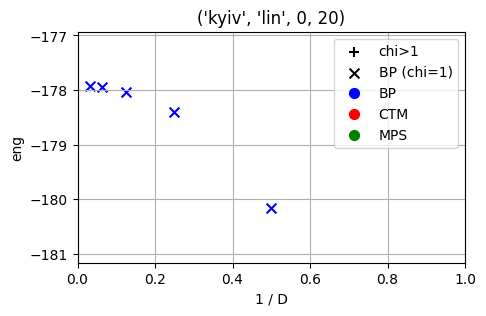

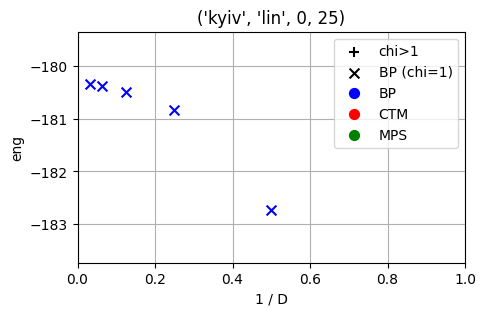

In [8]:
for p in range(5, 26, 5):
    plot_energy_lin(('kyiv', 'lin', 0, p))

Compare energy (in BP) for D64, D32, D16;  [convergence with D]

In [16]:
def plot_energy(which, ang, les):

    ps = list(range(5, 26, 5))
    evs = []
    for p in ps:
        ind = (which, ang, les, p)
        ev1, ev2 = 0, 0
        for x in res[ind]:
            if x['D'] == '32' and x['env'] == 'BP':
                ev1 = float(x['eng'])
        evs.append(ev1)    

    plt.plot(ps, evs, '-+', label=f"{which} {ang}_{les}")

    plt.xlabel('p')
    plt.ylabel(f'Eng')
    # plt.title(f"{which}, {ang}, {les}")
    plt.plot([5, 25], [gs[which]]*2, '--k')

    plt.ylim([-250, 250])
    plt.legend()
# plt.show()

Energy for D=32

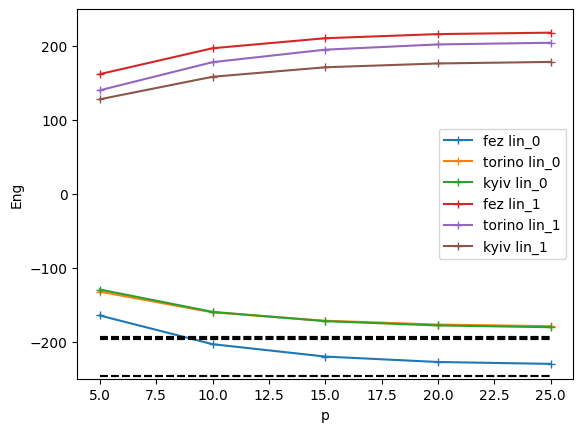

In [17]:
plot_energy('fez', 'lin', 0)
plot_energy('torino', 'lin', 0)
plot_energy('kyiv', 'lin', 0)

plot_energy('fez', 'lin', 1)
plot_energy('torino', 'lin', 1)
plot_energy('kyiv', 'lin', 1)

In [11]:
def plot_contraction_comparison(ind):

    clrs = {"BP": 'blue', "CTM": 'red', 'MPS': 'green'}
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(5, 3)

    if ind in res:
        tmp = {(x['D'], x['env'], x['chi']): float(x['eng'])  for x in res[ind]}
        try:
            for D in [4, 8, 16, 32]:
                dE = tmp[(str(D), 'BP', '1')] - tmp[(str(D), 'MPS', '8')] 
                ax.scatter([1 / float(D)], abs(dE),
                            marker='+', color='b', s=100)
                
                dE = tmp[(str(D), 'BP', '1')] - tmp[(str(D), 'CTM', '8')] 
                ax.scatter([1 / float(D)], abs(dE),
                            marker='x', color='r', s=100)
        except KeyError:
            pass

    ax.set_yscale('log')
    ax.set_xlabel('1 / D')
    ax.set_ylabel(f'|E(MPS chi=8) - E(BP chi=1)|')
    ax.set_ylim(1e-6, 1e-0)
    ax.set_xlim(0, 0.26)

    ax.grid(which='major')
    ax.grid(which='minor')
    ax.set_title(f"{ind}")
    plt.show()

Here show convergence of energy (energy difference) between BP and MPS/CTM with chi=8

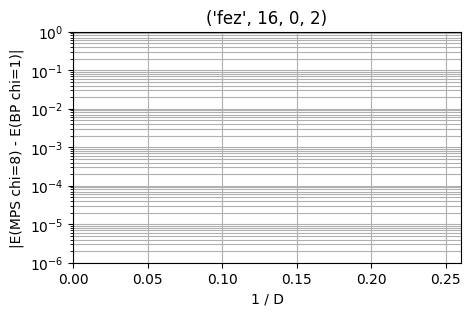

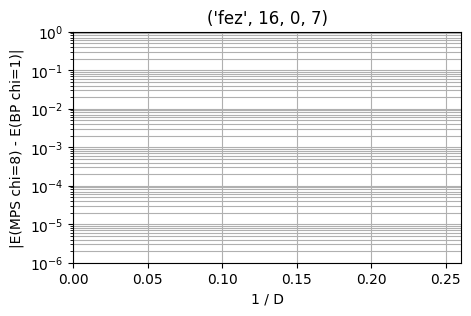

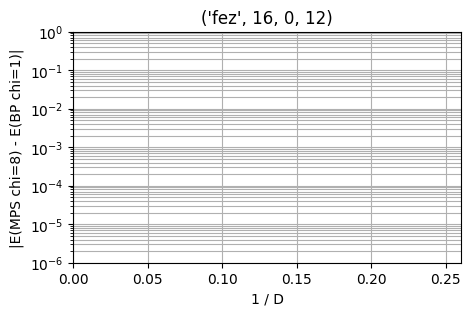

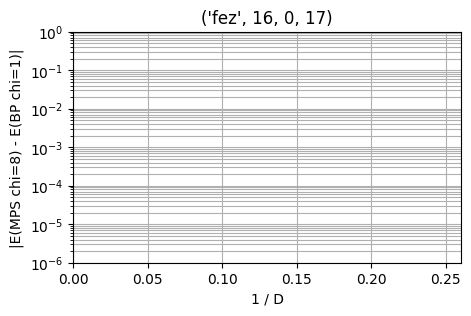

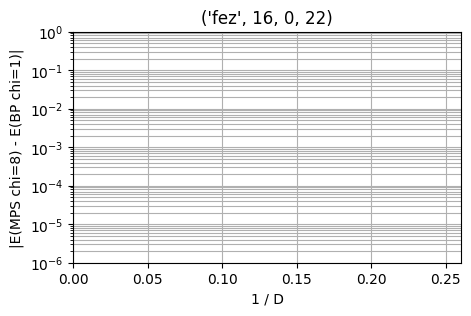

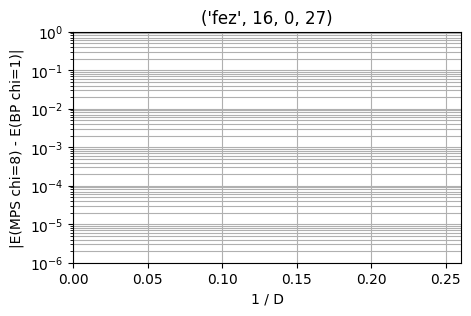

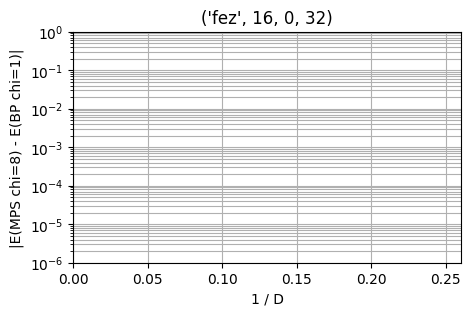

In [12]:
for p in range(2, 37, 5):
    plot_contraction_comparison(('fez', 16, 0, p))


In [13]:
smpls = {}
for which in ['fez', 'kyiv', 'torino']:
    for ang in [16]:
        for les in [0]:
            for p in range(37):
                for D in [8, 32]:
                    fname = Path(f"./results/Hamiltonian_ibm_{which}_0/{ang}_{les}/{p=}/samples_D={D}_CTM_chi=2.npy")
                    try:
                        ind = (which, ang, les, p, D)
                        smpls[ind] = np.load(fname, allow_pickle=True).item()
                    except FileNotFoundError:
                        pass

In [14]:
for i in sorted(smpls):
    print(i)

('fez', 16, 0, 1, 8)
('fez', 16, 0, 1, 32)
('fez', 16, 0, 2, 8)
('fez', 16, 0, 2, 32)
('fez', 16, 0, 3, 8)
('fez', 16, 0, 3, 32)
('fez', 16, 0, 4, 8)
('fez', 16, 0, 4, 32)
('fez', 16, 0, 5, 8)
('fez', 16, 0, 6, 8)
('fez', 16, 0, 7, 8)
('fez', 16, 0, 8, 8)
('fez', 16, 0, 9, 8)
('fez', 16, 0, 10, 8)
('fez', 16, 0, 11, 8)
('fez', 16, 0, 12, 8)
('fez', 16, 0, 13, 8)
('fez', 16, 0, 14, 8)
('fez', 16, 0, 15, 8)
('fez', 16, 0, 16, 8)
('kyiv', 16, 0, 1, 8)
('kyiv', 16, 0, 1, 32)
('kyiv', 16, 0, 2, 8)
('kyiv', 16, 0, 2, 32)
('kyiv', 16, 0, 3, 8)
('kyiv', 16, 0, 3, 32)
('kyiv', 16, 0, 4, 8)
('kyiv', 16, 0, 4, 32)
('kyiv', 16, 0, 5, 8)
('kyiv', 16, 0, 6, 8)
('kyiv', 16, 0, 7, 8)
('kyiv', 16, 0, 8, 8)
('kyiv', 16, 0, 9, 8)
('kyiv', 16, 0, 10, 8)
('kyiv', 16, 0, 11, 8)
('kyiv', 16, 0, 12, 8)
('kyiv', 16, 0, 13, 8)
('kyiv', 16, 0, 14, 8)
('kyiv', 16, 0, 15, 8)
('kyiv', 16, 0, 16, 8)
('torino', 16, 0, 1, 8)
('torino', 16, 0, 1, 32)
('torino', 16, 0, 2, 8)
('torino', 16, 0, 2, 32)
('torino', 16, 0, 3,